# 1. Import libraries

In [56]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data

## Features
- STG: The degree of study time for goal object materails
- SCG: The degree of repetition number of user for goal object materails
- STR: The degree of study time of user for related objects with goal object
- LPR: The exam performance of user for related objects with goal object
- PEG: The exam performance of user for goal objects

## Target - UNS: The knowledge level of user
- Very low: 0
- Low: 1
- Middle: 2
- High: 3

In [47]:
train = pd.read_excel("train.xlsx")
test = pd.read_excel("test.xlsx")

In [48]:
mapping_dic = {"UNS": {"very_low": 0, "Very Low": 0, "Low": 1, "Middle": 2, "High": 3}}
train.replace(mapping_dic,inplace = True)
test.replace(mapping_dic,inplace = True)

# 3. Data Analysis

## 3.1. Train set

In [80]:
display(train.info())
display(train.describe())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
STG    258 non-null float64
SCG    258 non-null float64
STR    258 non-null float64
LPR    258 non-null float64
PEG    258 non-null float64
UNS    258 non-null int64
dtypes: float64(5), int64(1)
memory usage: 12.2 KB


None

,STG,SCG,STR,LPR,PEG,UNS
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539,1.736434
std,0.210271,0.211962,0.245940,0.248108,0.255211,0.933754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000,1.000000
50%,0.327000,0.302500,0.490000,0.330000,0.500000,2.000000
75%,0.495000,0.497500,0.690000,0.647500,0.660000,2.000000
max,0.990000,0.900000,0.950000,0.990000,0.930000,3.000000


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,3
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1


<div class="alert alert-block alert-success">
    There are no null or missing values in the <b>train</b> set.
</div>

## 3.2. Test set

In [58]:
display(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
STG    145 non-null float64
SCG    145 non-null float64
STR    145 non-null float64
LPR    145 non-null float64
PEG    145 non-null float64
UNS    145 non-null int64
dtypes: float64(5), int64(1)
memory usage: 6.9 KB


None

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3


<div class="alert alert-block alert-success">
    There are no null or missing values in the <b>test</b> set.
</div>

## 3.3. Correlating features with the knowledge level

In [82]:
def analyze_feature(feature):
    '''
    This function displays the mean and median values of the input feature for each target class. 
    Also, it generates a histogram for each class with the counts across the feature values.
    
    Arguments:
        feature - input feature
    '''
    display(train[[feature, 'UNS']].groupby(['UNS'], as_index=False).mean().sort_values(by='UNS', ascending=False).rename(columns={feature: feature + " mean"}))
    display(train[[feature, 'UNS']].groupby(['UNS'], as_index=False).median().sort_values(by='UNS', ascending=False).rename(columns={feature: feature + " median"}))
    g = sns.FacetGrid(train, col='UNS')
    g.map(plt.hist, feature, bins=20)
    return

## 3.3.1. STG: The degree of study time for goal object materails

,UNS,STG mean
3,3,0.421651
2,2,0.399977
1,1,0.321145
0,0,0.305792


,UNS,STG median
3,3,0.4000
2,2,0.3775
1,1,0.2950
0,0,0.2775


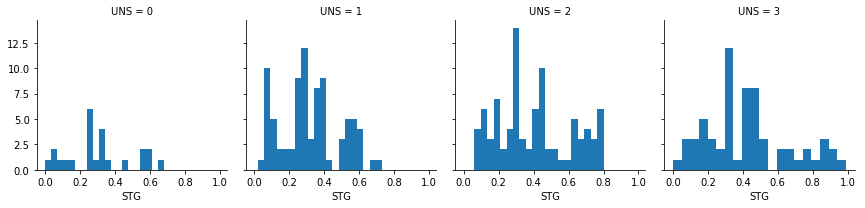

In [74]:
analyze_feature("STG")

## 3.3.2. SCG: The degree of repetition number of user for goal object materails

,UNS,SCG mean
3,3,0.423190
2,2,0.367920
1,1,0.337000
0,0,0.198125


,UNS,SCG median
3,3,0.340
2,2,0.300
1,1,0.299
0,0,0.185


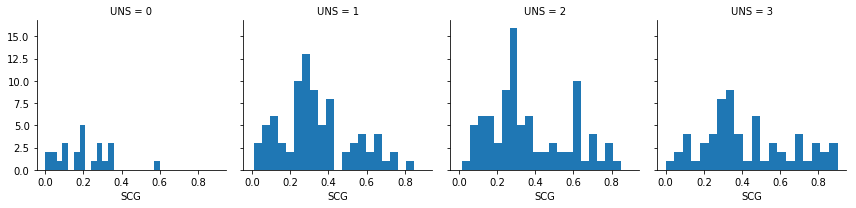

In [75]:
analyze_feature("SCG")

## 3.3.3. STR: The degree of study time of user for related objects with goal object

,UNS,STR mean
3,3,0.501667
2,2,0.506818
1,1,0.430723
0,0,0.366250


,UNS,STR median
3,3,0.520
2,2,0.530
1,1,0.390
0,0,0.335


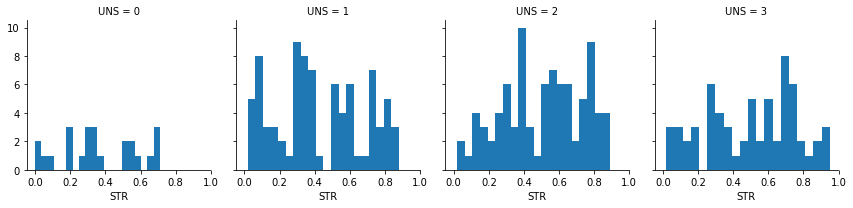

In [76]:
analyze_feature("STR")

## 3.3.4. LPR: The exam performance of user for related objects with goal object

,UNS,LPR mean
3,3,0.501270
2,2,0.342841
1,1,0.497349
0,0,0.358750


,UNS,LPR median
3,3,0.400
2,2,0.290
1,1,0.490
0,0,0.365


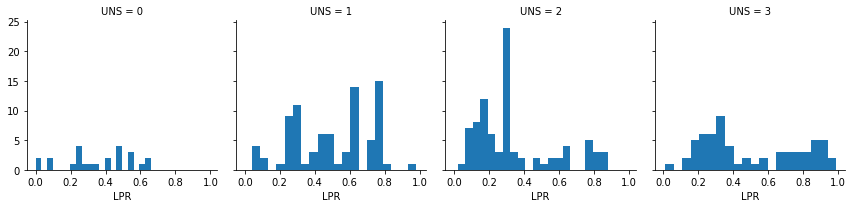

In [77]:
analyze_feature("LPR")

## 3.3.5. PEG: The exam performance of user for goal objects


,UNS,PEG mean
3,3,0.772540
2,2,0.542386
1,1,0.237627
0,0,0.090833


,UNS,PEG median
3,3,0.79
2,2,0.57
1,1,0.25
0,0,0.10


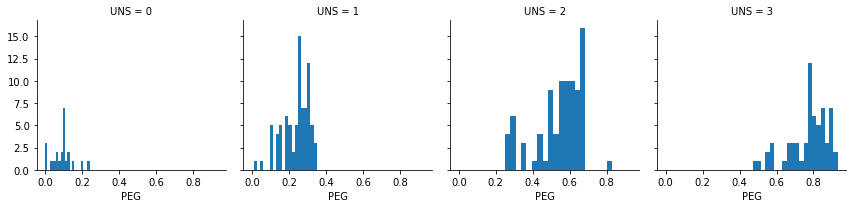

In [78]:
analyze_feature("PEG")